In [1]:
import sys
import time
sys.path.insert(0,'../..')
import omama as O
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

In [2]:
imgs = O.DataHelper.get2D(N=2, config_num=2)

In [3]:
norm = O.Normalize.minmax(imgs[0].pixels)

In [4]:
img1 = norm.copy()

In [5]:
img2 = transform.rotate(img1, 180)

In [6]:
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))

In [7]:
img3 = transform.warp(img1, tform)

In [8]:
descriptor_extractor = SIFT()

In [9]:
descriptor_extractor.detect_and_extract(img1)

In [10]:
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

In [11]:
descriptor_extractor.detect_and_extract(img2)

In [12]:
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [13]:
descriptor_extractor.detect_and_extract(img3)

In [14]:
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

In [15]:
matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6, cross_check=True)

In [16]:
matches13 = match_descriptors(descriptors1, descriptors3, max_ratio=0.6, cross_check=True)

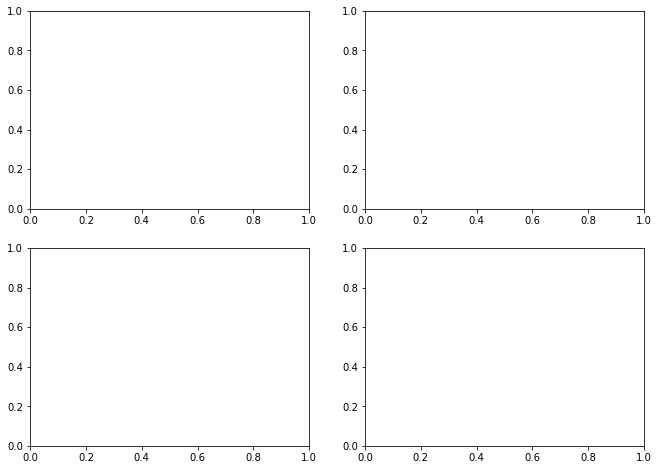

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

In [33]:

plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [34]:

plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [35]:

plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15],
             only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [36]:

plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15],
             only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [37]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>